In [ ]:
# Reading the dataset
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/ParisHousing.csv')

In [ ]:
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [ ]:
# Shape of the data
data.shape

(10000, 17)

# **Data preprocessing**

In [ ]:
# Checking null values in dataset
data.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [ ]:
# Defining input-output features
X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

In [ ]:
# Input feature matrix
X

array([[75523,     3,     0, ...,   956,     0,     7],
       [80771,    39,     1, ...,   128,     1,     2],
       [55712,    58,     0, ...,   135,     1,     9],
       ...,
       [83841,     3,     0, ...,   345,     1,     9],
       [59036,    70,     0, ...,   339,     1,     4],
       [ 1440,    84,     0, ...,   278,     1,     6]])

In [ ]:
# Output feature
y

array([7559081.5, 8085989.5, 5574642.1, ..., 8390030.5, 5905107. ,
        146708.4])

We can see the values for the training patterns are not in one range or closer range. Neural networks are highly sensitive to large values, so better we should scale down all the input features. 

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X

array([[ 0.89156241, -1.64351831, -1.01755405, ...,  1.53748782,
        -1.00601811,  0.63137326],
       [ 1.07395603, -0.39418009,  0.98274878, ..., -1.62237047,
         0.99401789, -0.9428096 ],
       [ 0.20303346,  0.26519286, -1.01755405, ..., -1.59565669,
         0.99401789,  1.26104641],
       ...,
       [ 1.18065352, -1.64351831, -1.01755405, ..., -0.79424336,
         0.99401789,  1.26104641],
       [ 0.31855868,  0.68163893, -1.01755405, ..., -0.81714088,
         0.99401789, -0.31313646],
       [-1.68318347,  1.16749268, -1.01755405, ..., -1.04993237,
         0.99401789,  0.31653669]])

In [ ]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [ ]:
# Shape of train-test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9000, 16)
(9000,)
(1000, 16)
(1000,)


# **Defining and training the neural network regression model**

In [ ]:
# Libraries for neural networks
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers

In short, the network will have 4 layers that are 1 input layer, 2 hidden layers, and 1 output layer. Let’s first import all the dependencies required to build the Neural Network model. 

Let’s build the regression model, notice that we have applied activation of the last two layers as Linear so that the output will be in continuous form.

In [ ]:
# Defining the neural network regression model
model = Sequential()
model.add(Dense(24, input_dim=16, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(12, activation='linear'))
model.add(Dense(1, activation='linear'))

Now let’s define the optimizer function. 

In [ ]:
# Defining optimizer
import tensorflow as tf
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07)

In [ ]:
# Compiling the classifier
model.compile(loss='mse', optimizer= opt, metrics=['mae'])

In [ ]:
# Summary of the neural network model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 28)                700       
                                                                 
 dense_2 (Dense)             (None, 12)                348       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1,469
Trainable params: 1,469
Non-trainable params: 0
_________________________________________________________________


We can check from the summary that we have successfully built 4 layered neural networks. Now let’s train the network for 50 epochs with a batch size of 8.

In [ ]:
# Training the ANN Regression model
history = model.fit(X_train, y_train, epochs=50, batch_size=8)

Epoch 1/50
1125/1125 [==============================] - 3s 2ms/step - loss: 32360703721472.0000 - mae: 4920221.5000
Epoch 2/50
1125/1125 [==============================] - 2s 2ms/step - loss: 19294184275968.0000 - mae: 3743987.0000
Epoch 3/50
1125/1125 [==============================] - 4s 4ms/step - loss: 1855354175488.0000 - mae: 1046611.5000
Epoch 4/50
1125/1125 [==============================] - 5s 4ms/step - loss: 134916628480.0000 - mae: 305173.3438
Epoch 5/50
1125/1125 [==============================] - 2s 2ms/step - loss: 103044816896.0000 - mae: 254775.3594
Epoch 6/50
1125/1125 [==============================] - 4s 3ms/step - loss: 89847996416.0000 - mae: 230557.8125
Epoch 7/50
1125/1125 [==============================] - 4s 4ms/step - loss: 76060631040.0000 - mae: 208632.5781
Epoch 8/50
1125/1125 [==============================] - 5s 4ms/step - loss: 61442441216.0000 - mae: 185386.6562
Epoch 9/50
1125/1125 [==============================] - 2s 2ms/step - loss: 47508250624.000

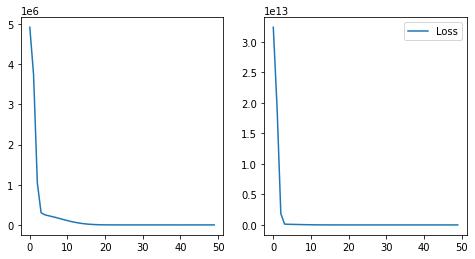

In [ ]:
# Plotting the performance
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4))
ax1.plot(history.history['mae'], label = 'MAE')
ax2.plot(history.history['loss'], label = 'Loss')
plt.legend()
plt.show()

# **Making Predictions**

In [ ]:
# Making predictions on test data
predictions = model.predict(X_test)

# Comparing predicted and actual prices
import pandas as pd
import numpy as np
pd.DataFrame(data={'Predicted Price': predictions[:,0], 'Actual Price': y_test})

,Predicted Price,Actual Price
0,1.405506e+06,1402812.2
1,5.081173e+05,506461.3
2,6.277831e+06,6272659.4
3,8.763293e+06,8769157.6
4,1.957657e+05,190783.0
...,...,...
995,3.654117e+06,3653259.0
996,4.085542e+06,4091282.1
997,6.966822e+06,6965618.1
998,9.876636e+06,9873946.9


In [ ]:
# MSE and RMSE
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(predictions[:,0], y_test)
rmse = math.sqrt(mse)
print('MSE = %2f; RMSE = %2f'% (mse, rmse))

MSE = 8488278.820793; RMSE = 2913.465088


As we can see the RMSE is 2913 means for each prediction there will be a difference of 2913 units.